In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def shuffle(df, n=1, axis=0):
    df = df.copy()
    for _ in range(n):
        df.apply(np.random.shuffle, axis=axis)
    return df

In [8]:
data1 = pd.read_csv('5000_features.csv')
data = pd.read_csv('5000_genderbias+.csv') 
#data=shuffle(data)

In [13]:
data.describe()

,label,F_feature,WC_1,WC_2,WC_3,WC_4,WC_5,WC_6,WC_7,WC_8,...,GRF_4,GRF_5,GRF_6,GRF_7,GRF_8,GRF_9,GRF_10,bias,word ratio,word count
count,5000.00000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,0.50000,2.273737e-17,0.093645,0.045241,0.112510,0.019594,0.065014,0.009498,0.058317,0.028847,...,0.020165,0.037591,0.099610,0.024158,0.340563,0.090995,0.002589,1.208864,6.695622e-01,72007.571400
std,0.50005,1.000100e+00,0.064645,0.052359,0.131076,0.017311,0.140505,0.008875,0.056700,0.054218,...,0.019133,0.056975,0.062923,0.022540,0.210717,0.157658,0.004375,0.839965,2.434521e-01,58705.187567
min,0.00000,-1.675320e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.407407e-09,297.000000
25%,0.00000,-5.830973e-01,0.030016,0.012903,0.053582,0.000946,0.022246,0.000000,0.038219,0.014598,...,0.007453,0.008724,0.067265,0.000000,0.189860,0.032812,0.000000,0.544440,4.990933e-01,27489.500000
50%,0.50000,-3.717218e-01,0.104288,0.046124,0.088086,0.020883,0.032580,0.008671,0.054198,0.022481,...,0.018804,0.027124,0.107439,0.025028,0.403392,0.054625,0.000524,0.973110,7.012832e-01,61857.500000
75%,1.00000,1.687270e-01,0.141340,0.061414,0.120967,0.030770,0.045189,0.015229,0.071680,0.031683,...,0.027027,0.047739,0.132748,0.035011,0.497168,0.073511,0.003793,1.763786,8.737521e-01,99864.750000
max,1.00000,1.110150e+01,0.500000,1.000000,1.000000,0.500000,1.000000,0.067719,1.000000,1.000000,...,0.271808,1.000000,0.573770,0.400000,1.000000,1.000000,0.081301,3.555348,1.000000e+00,920459.000000


In [14]:
data_female = data[data['label'] == 0]
data_female.describe()

,label,F_feature,WC_1,WC_2,WC_3,WC_4,WC_5,WC_6,WC_7,WC_8,...,GRF_4,GRF_5,GRF_6,GRF_7,GRF_8,GRF_9,GRF_10,bias,word ratio,word count
count,2500.0,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000
mean,0.0,-0.211556,0.114192,0.052997,0.113684,0.023736,0.046676,0.011803,0.055604,0.024914,...,0.020766,0.035755,0.111441,0.028422,0.413434,0.089418,0.003699,0.960938,5.754751e-01,73652.700000
std,0.0,0.780283,0.059727,0.041825,0.105766,0.014432,0.091453,0.008502,0.041248,0.034343,...,0.015399,0.048077,0.055271,0.021097,0.178087,0.148106,0.004927,0.679110,2.268244e-01,56798.177085
min,0.0,-1.675320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.407407e-09,297.000000
25%,0.0,-0.617489,0.083128,0.038446,0.072135,0.015081,0.024716,0.005459,0.041526,0.016200,...,0.012410,0.015228,0.092394,0.017544,0.362546,0.042271,0.000000,0.492559,4.214524e-01,32480.750000
50%,0.0,-0.482506,0.124912,0.055184,0.097471,0.025555,0.031765,0.011976,0.052771,0.021858,...,0.020072,0.027504,0.113416,0.028518,0.458976,0.055435,0.002213,0.719501,5.645825e-01,64975.000000
75%,0.0,-0.163853,0.154320,0.067309,0.126289,0.032704,0.041043,0.016690,0.066106,0.028576,...,0.027199,0.044192,0.136314,0.037519,0.523911,0.070788,0.005635,1.224409,7.341843e-01,100533.250000
max,0.0,6.025908,0.500000,1.000000,0.779357,0.094590,0.802817,0.060241,1.000000,1.000000,...,0.161922,1.000000,0.542282,0.211351,1.000000,1.000000,0.081301,3.353203,1.000000e+00,920459.000000


In [16]:
data_male = data[data['label'] == 1]
data_male.describe()

,label,F_feature,WC_1,WC_2,WC_3,WC_4,WC_5,WC_6,WC_7,WC_8,...,GRF_4,GRF_5,GRF_6,GRF_7,GRF_8,GRF_9,GRF_10,bias,word ratio,word count
count,2500.0,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000
mean,1.0,0.211556,0.073098,0.037485,0.111336,0.015452,0.083352,0.007192,0.061031,0.032780,...,0.019565,0.039427,0.087779,0.019894,0.267692,0.092572,0.001480,1.456790,7.636494e-01,70362.442800
std,0.0,1.141233,0.062829,0.060118,0.152247,0.018891,0.174512,0.008638,0.068665,0.068338,...,0.022235,0.064618,0.067714,0.023126,0.215596,0.166679,0.003398,0.909500,2.222621e-01,60518.833295
min,1.0,-1.073360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.234568e-08,422.000000
25%,1.0,-0.513281,0.000000,0.000000,0.007834,0.000000,0.015914,0.000000,0.027908,0.010466,...,0.000000,0.001229,0.017846,0.000000,0.002959,0.003618,0.000000,0.730632,6.648987e-01,23582.000000
50%,1.0,-0.188181,0.079722,0.033438,0.076411,0.011183,0.033814,0.004303,0.056959,0.023598,...,0.017176,0.026205,0.097556,0.019787,0.332260,0.053191,0.000000,1.394456,8.158066e-01,58444.500000
75%,1.0,0.521821,0.122176,0.052258,0.112847,0.026437,0.051844,0.012296,0.078174,0.036342,...,0.026720,0.053062,0.127930,0.031893,0.443853,0.076724,0.001504,2.188705,9.337710e-01,98653.500000
max,1.0,11.101502,0.312306,1.000000,1.000000,0.500000,1.000000,0.067719,1.000000,1.000000,...,0.271808,0.885714,0.573770,0.400000,1.000000,1.000000,0.043478,3.555348,1.000000e+00,469263.000000


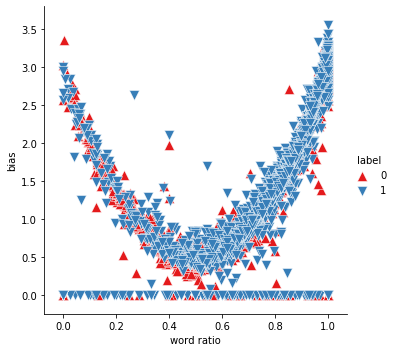

In [18]:
g = sns.FacetGrid(data,
                  hue="label",
                  palette="Set1",
                  height=5,
                  hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter,
      "word ratio",
      "bias",
      s=100,
      linewidth=.5,
      edgecolor="white")
g.add_legend()

In [ ]:
# List of five airlines to plot
genders = ['female', 'male']

# Iterate through the five airlines
for gender in genders:
    # Subset to the airline
    if gender == 'female':
        subset = data[data['gender'] == 0]
    else:
        subset = data[data['gender'] == 1]

    # Draw the density plot
    sns.distplot(subset['word ratio'],
                 hist=False,
                 kde=True,
                 kde_kws={'linewidth': 3},
                 label=gender)

# Plot formatting
plt.legend(prop={'size': 16}, title='gender', fontsize=16)
plt.title('Density Plot of Word Ratio with Different Genders', fontsize=16)
plt.xlabel('Word Ratio', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.savefig('5000-wordratio.png', dpi=150)

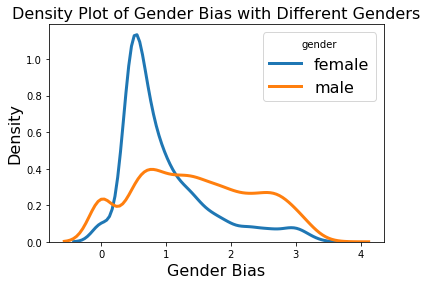

In [9]:
# List of five airlines to plot
genders = ['female', 'male']

# Iterate through the five airlines
for gender in genders:
    # Subset to the airline
    if gender == 'female':
        subset = data[data['gender'] == 0]
    else:
        subset = data[data['gender'] == 1]

    # Draw the density plot
    sns.distplot(subset['bias'],
                 hist=False,
                 kde=True,
                 kde_kws={'linewidth': 3},
                 label=gender)

# Plot formatting
plt.legend(prop={'size': 16}, title='gender', fontsize=16)
plt.title('Density Plot of Gender Bias with Different Genders', fontsize=16)
plt.xlabel('Gender Bias', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.savefig('5000-bias.png', dpi=150)

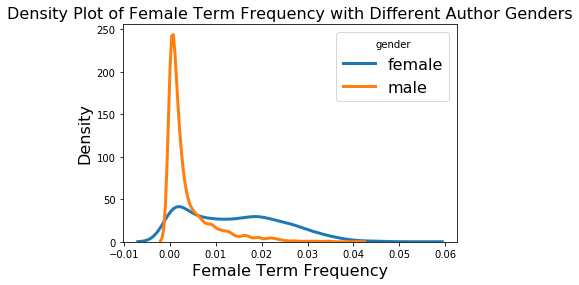

In [13]:
# List of five airlines to plot
genders = ['female', 'male']

# Iterate through the five airlines
for gender in genders:
    # Subset to the airline
    if gender == 'female':
        subset = data[data['gender'] == 0]
    else:
        subset = data[data['gender'] == 1]

    # Draw the density plot
    sns.distplot(subset['TFF'],
                 hist=False,
                 kde=True,
                 kde_kws={'linewidth': 3},
                 label=gender)

# Plot formatting
plt.legend(prop={'size': 16}, title='gender', fontsize=16)
plt.title('Density Plot of Female Term Frequency with Different Author Genders', fontsize=16)
plt.xlabel('Female Term Frequency', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.savefig('5000-TFF.png', dpi=150)

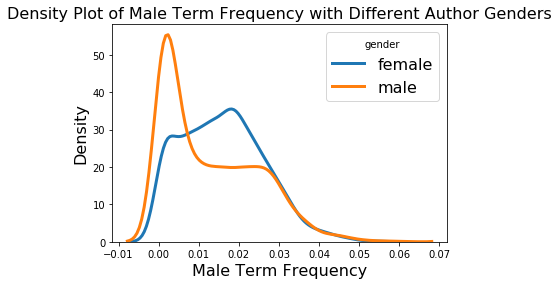

In [14]:
# List of five airlines to plot
genders = ['female', 'male']

# Iterate through the five airlines
for gender in genders:
    # Subset to the airline
    if gender == 'female':
        subset = data[data['gender'] == 0]
    else:
        subset = data[data['gender'] == 1]

    # Draw the density plot
    sns.distplot(subset['TFM'],
                 hist=False,
                 kde=True,
                 kde_kws={'linewidth': 3},
                 label=gender)

# Plot formatting
plt.legend(prop={'size': 16}, title='gender', fontsize=16)
plt.title('Density Plot of Male Term Frequency with Different Author Genders', fontsize=16)
plt.xlabel('Male Term Frequency', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.savefig('5000-TFM.png', dpi=150)